In [1]:
import matplotlib.pyplot as plt
import _pickle as pickle
import tensorflow as tf
import sys
print(sys.path)
from core.solver import CaptioningSolver
from core.model import CaptionGenerator
from core.utils import load_coco_data



from core.bleu import evaluate

%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0)  # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

%load_ext autoreload
%autoreload 2

['', '/opt/caffe-rc4/python', '/opt/anaconda3/lib/python35.zip', '/opt/anaconda3/lib/python3.5', '/opt/anaconda3/lib/python3.5/plat-linux', '/opt/anaconda3/lib/python3.5/lib-dynload', '/opt/anaconda3/lib/python3.5/site-packages', '/opt/anaconda3/lib/python3.5/site-packages/Sphinx-1.4.6-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/Keras-2.0.3-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/Theano-0.10.0b4-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/hickle-2.0.5-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/setuptools-27.2.0-py3.5.egg', '/opt/anaconda3/lib/python3.5/site-packages/IPython/extensions', '/root/.ipython']


In [2]:
data = load_coco_data(data_path='./resized_training_data', split='val')
with open('./resized_training_data/train/word_to_idx.pkl', 'rb') as f:
    word_to_idx = pickle.load(f)

/data_0 n KeysView(<Attributes of HDF5 object at 140697225809280>)
file_names <class 'numpy.ndarray'> (869,) <U42
image_idxs <class 'numpy.ndarray'> (869,) int32
features <class 'numpy.ndarray'> (869, 196, 512) float32
captions <class 'numpy.ndarray'> (869, 17) int32
Elapse time: 0.13


In [3]:
model = CaptionGenerator(word_to_idx, dim_feature=[196, 512], dim_embed=512,
                                   dim_hidden=1024, n_time_step=16, prev2out=True, 
                                             ctx2out=True, alpha_c=1.0, selector=True, dropout=True)

In [4]:
solver = CaptioningSolver(model, data, data, n_epochs=15, batch_size=128, update_rule='adam',
                                      learning_rate=0.0025, print_every=2000, save_every=1, image_path='./image/',
                                pretrained_model=None, model_path='./model/lstm', test_model='./model/lstm/model-20',
                                 print_bleu=False, log_path='./log/')

HI
Tensor("fc3/squeezed:0", shape=(?, 2255), dtype=float32)
Tensor("Sigmoid:0", shape=(?, 2255), dtype=float32)
Tensor("gcn_layer1/Sigmoid:0", shape=(?, 3978), dtype=float32)
Tensor("gcn_layer1/Sigmoid:0", shape=(?, 3978), dtype=float32)
features_mean: (?, 512)
D: 512
final_confidence: (?, 3978)
(?, 1024)
Sampled Caption: a person standing in front of a truck .


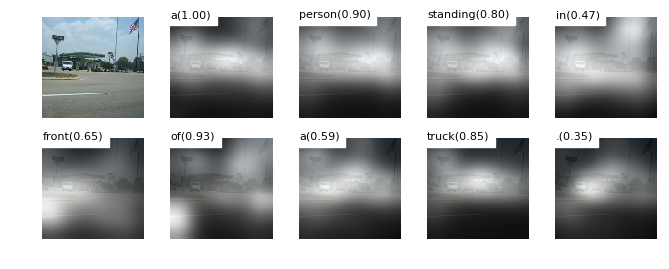

Sampled Caption: a window on the side of a building .


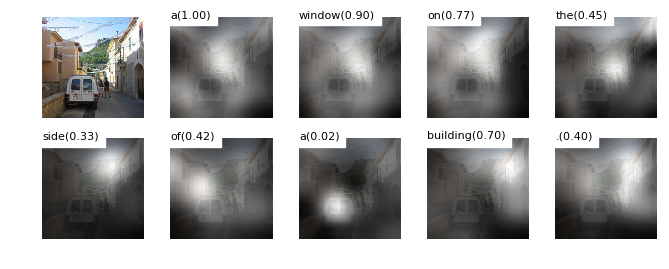

Sampled Caption: a man wearing a black shirt .


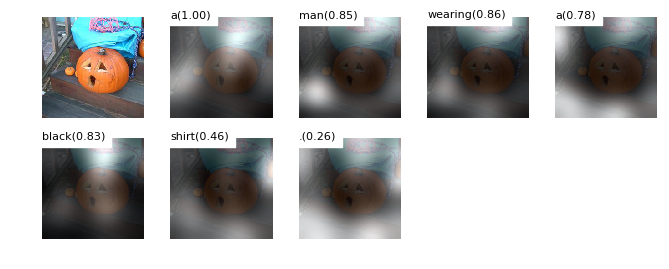

Sampled Caption: a window on the side of a building .


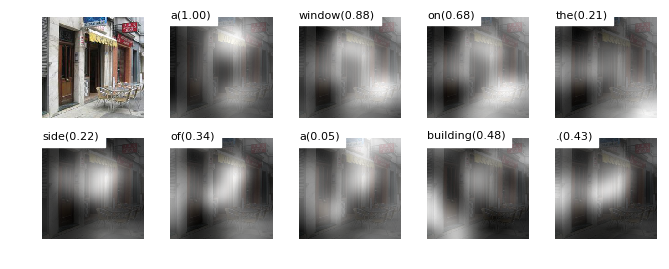

Sampled Caption: a window on a building .


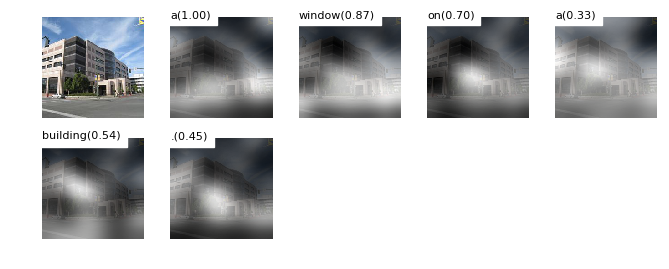

Sampled Caption: the plane is white in color .


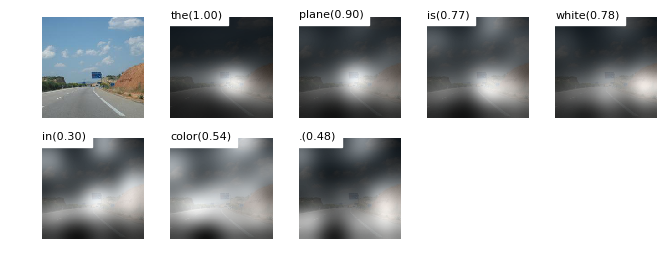

Sampled Caption: the plane is white in color .


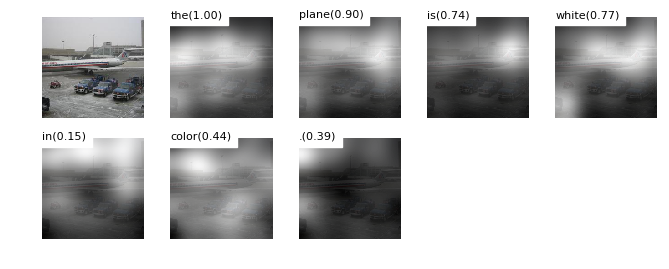

Sampled Caption: the sheep are eating .


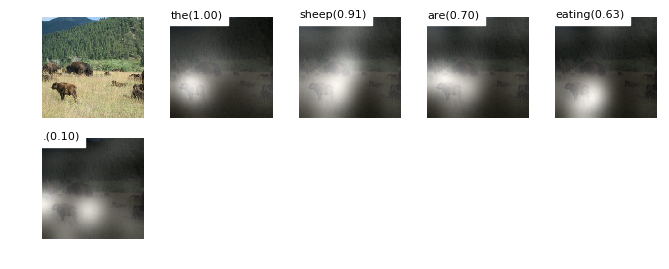

Sampled Caption: a painting on the wall .


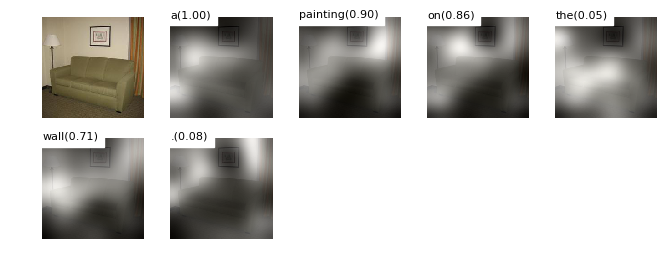

Sampled Caption: a window in the window .


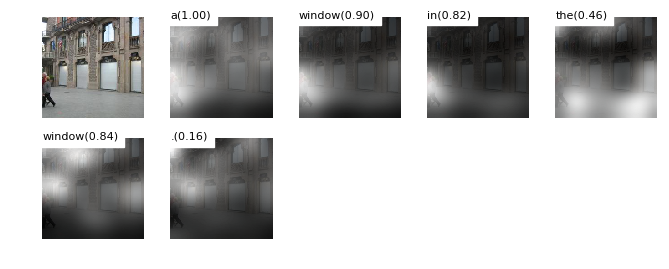

Saved ./resized_training_data/val/val.candidate.captions.pkl..


In [5]:
solver.test(data, split='val')

In [6]:
test = load_coco_data(data_path='./resized_training_data', split='test')

/data_0 n KeysView(<Attributes of HDF5 object at 140695494017960>)
file_names <class 'numpy.ndarray'> (870,) <U42
image_idxs <class 'numpy.ndarray'> (870,) int32
features <class 'numpy.ndarray'> (870, 196, 512) float32
captions <class 'numpy.ndarray'> (870, 17) int32
Elapse time: 0.14


HI
Tensor("fc3/squeezed_1:0", shape=(?, 2255), dtype=float32)
Tensor("Sigmoid_1:0", shape=(?, 2255), dtype=float32)
Tensor("gcn_layer1_1/Sigmoid:0", shape=(?, 3978), dtype=float32)
Tensor("gcn_layer1_1/Sigmoid:0", shape=(?, 3978), dtype=float32)
features_mean: (?, 512)
D: 512
final_confidence: (?, 3978)
(?, 1024)
Sampled Caption: a window on the building .


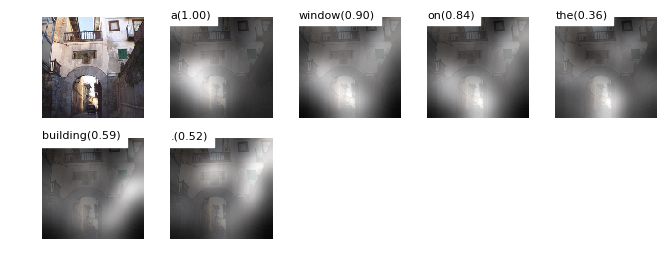

Sampled Caption: a tree in the distance .


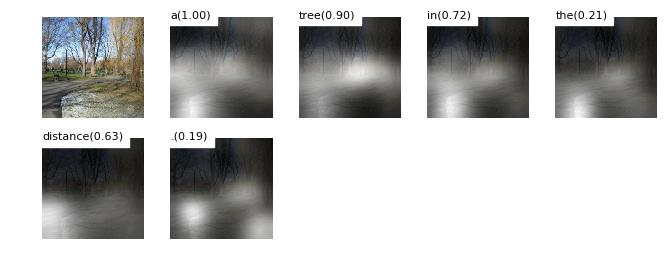

Sampled Caption: a person wearing a white shirt .


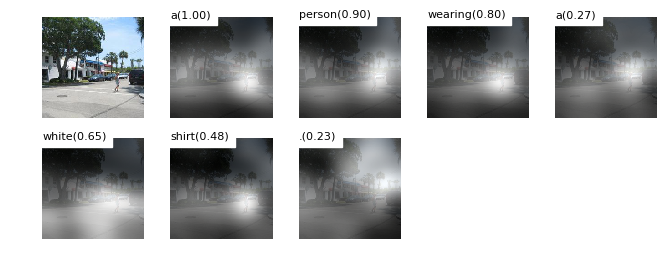

Sampled Caption: a person wearing a white shirt .


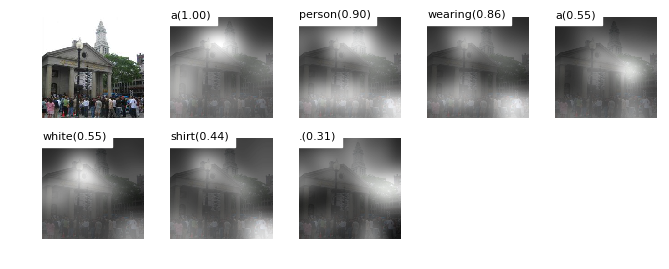

Sampled Caption: a man wearing a black jacket .


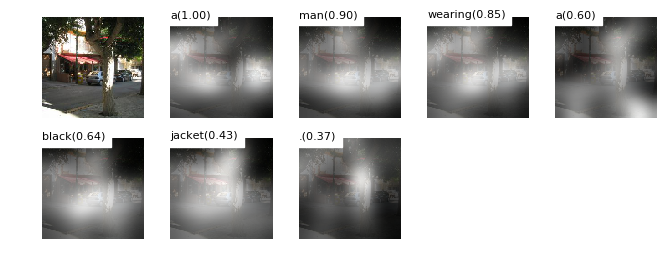

Sampled Caption: the tree has green leaves .


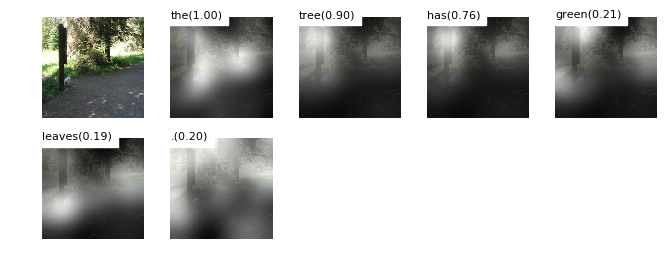

Sampled Caption: a person wearing a white shirt .


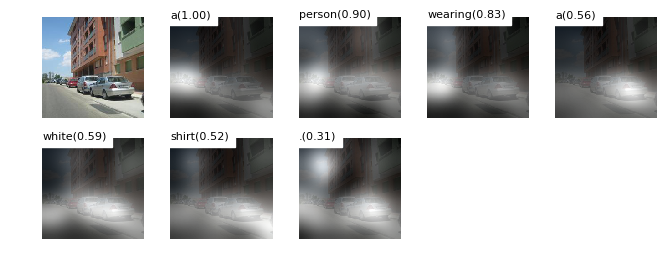

Sampled Caption: the leaves are green in color .


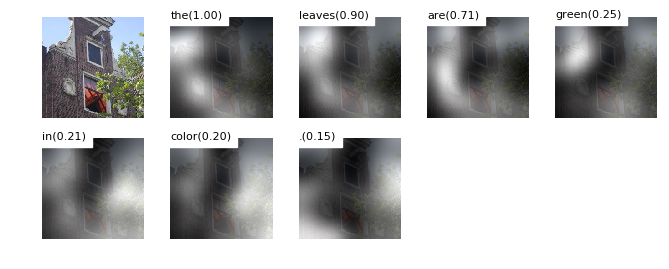

Sampled Caption: the grass is growing .


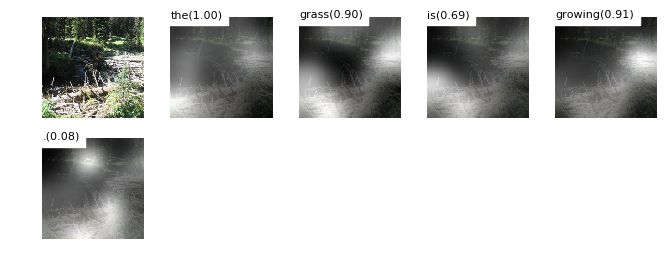

Sampled Caption: a window on a building .


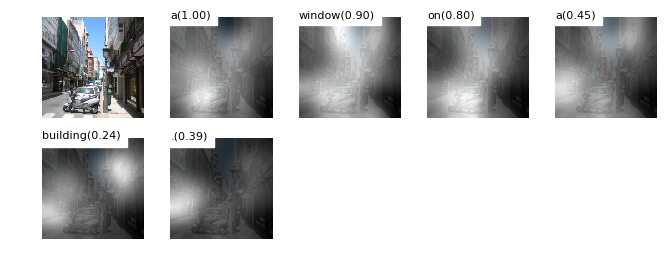

Saved ./resized_training_data/test/test.candidate.captions.pkl..


In [7]:
tf.get_variable_scope().reuse_variables()
solver.test(test, split='test')

In [ ]:
from core.bleu import evaluate

In [10]:
evaluate(data_path='./resized_training_data', split='val')

['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4'] started
{'testlen': 6083, 'reflen': 6075, 'guess': [6083, 5214, 4345, 3476], 'correct': [1851, 241, 78, 37]}
ratio: 1.0013168724278187
['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4'] done
ROUGE_L started
ROUGE_L done
CIDEr started
CIDEr done
Bleu_1:	 0.3042906460627479
Bleu_2:	 0.11859525384670809
Bleu_3:	 0.06320427877909394
Bleu_4:	 0.04048930750798688
ROUGE_L: 0.29788801531
CIDEr:	 0.3378698902


In [11]:
evaluate(data_path='./resized_training_data', split='test')

['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4'] started
{'testlen': 5980, 'reflen': 6051, 'guess': [5980, 5110, 4240, 3370], 'correct': [1991, 275, 102, 51]}
ratio: 0.988266402247399
['Bleu_1', 'Bleu_2', 'Bleu_3', 'Bleu_4'] done
ROUGE_L started
ROUGE_L done
CIDEr started
CIDEr done
Bleu_1:	 0.329013514162107
Bleu_2:	 0.13227707888816817
Bleu_3:	 0.07464757820763837
Bleu_4:	 0.04994106228190427
ROUGE_L: 0.319399044857
CIDEr:	 0.399262435134
